In [39]:
import pandas as pd
df = pd.read_csv("fico.csv")
df.head(20)

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
5,6,669
6,7,805
7,8,850
8,9,838
9,10,850


In [40]:
mask = df.dropna()
mask.head(20)

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
5,6,669
6,7,805
7,8,850
8,9,838
9,10,850


In [41]:
duplicates = mask[mask.duplicated('acct_id')]
print(duplicates)

       acct_id FICO
140        140  752
190        189  745
192        190  828
194        191  752
196        192  850
30506    30501  773
30508    30502  798
30510    30503  820
30514    30505  820
30520    30508  850


In [42]:
clean = mask.drop_duplicates(subset='acct_id')
duplicates2 = clean[clean.duplicated('acct_id')]
print(duplicates2)
print(clean.head(20))



Empty DataFrame
Columns: [acct_id, FICO]
Index: []
    acct_id FICO
0         1  768
1         2  850
2         3  677
3         4  843
4         5  796
5         6  669
6         7  805
7         8  850
8         9  838
9        10  850
11       12  794
12       13  832
13       14  777
14       15  809
15       16  793
16       17  746
18       19  781
19       20  812
20       21  811
21       22  849


In [43]:

clean2 = clean

#clean2.iloc[clean2[['FICO']].convert_objects(convert_numeric=True).dropna().index]

clean2 = clean2[pd.to_numeric(clean2.acct_id, errors='coerce').notnull()]
clean2 = clean2[pd.to_numeric(clean2.FICO, errors='coerce').notnull()]

print(clean2.head(20))

fico_clean = clean2.set_index('acct_id')
fico_clean.to_csv('fico_clean.csv')

    acct_id FICO
0         1  768
1         2  850
2         3  677
3         4  843
4         5  796
5         6  669
6         7  805
7         8  850
8         9  838
9        10  850
11       12  794
12       13  832
13       14  777
14       15  809
15       16  793
16       17  746
18       19  781
19       20  812
20       21  811
21       22  849


In [44]:
max_value = fico_clean['FICO'].max()
min_value = fico_clean['FICO'].min()
print(max_value)
print(min_value)

850
420


In [45]:
print(fico_clean.dtypes)
fico_clean2 = fico_clean.astype('int')
#fico_clean2['FICO'] = fico_clean2['FICO'].astype('int')
#fico_clean2 = fico_clean2[pd.to_numeric(fico_clean2.FICO, errors='coerce').notnull()]

print(fico_clean2.dtypes)


FICO    object
dtype: object
FICO    int64
dtype: object


In [46]:
set1 = fico_clean2[fico_clean2['FICO'] <= 500]
set2 = fico_clean2[(fico_clean2['FICO'] <= 600) & (fico_clean2['FICO'] > 500)]
set3 = fico_clean2[(fico_clean2['FICO'] <= 700) & (fico_clean2['FICO'] > 600)]
set4 = fico_clean2[(fico_clean2['FICO'] <= 800) & (fico_clean2['FICO'] > 700)]
set5 = fico_clean2[(fico_clean2['FICO'] <= 900) & (fico_clean2['FICO'] > 800)]
print(set1)

         FICO
acct_id      
3326      500
5391      489
7602      420
8401      493
9412      500
...       ...
91570     494
96724     491
97205     498
97564     482
98627     495

[69 rows x 1 columns]


In [51]:
set1.to_csv('set1.csv')
set2.to_csv('set2.csv')
set3.to_csv('set3.csv')
set4.to_csv('set4.csv')
set5.to_csv('set5.csv')


<AxesSubplot:ylabel='Frequency'>

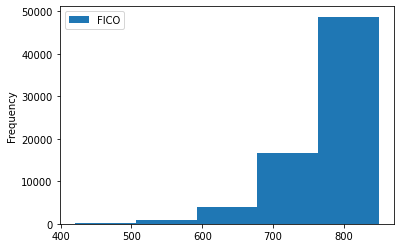

In [56]:
ax = fico_clean2.plot.hist(bins = 5)